In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import atus_tools
import john_list

BLS claims to compare to
- Adults in homes with children <6 years old spent much more time caring than adults with older children
- Women spent more time than men caring for children
- More primary childcare happens on weekdays, more secondary care happens on weekends

# Men vs Women, caring for children

In [2]:
summary = pd.read_csv("../atusdata/atussum_2013/atussum_2013.dat")       # Activity Summary

In [3]:
under_6 = summary[(summary.TRYHHCHILD < 6) & (summary.TRYHHCHILD > -1)] # yields 2048 rows, about 20% of survey

In [4]:
care_time = atus_tools.cut_by_sex(under_6, "03")

In [5]:
care_time

,Caring For & Helping 0,Activities Related t 1,Activities Related t 2,Caring For Household 3,Helping Household Ad 4,Caring For & Helping 5
men,9.240650,0.390650,0.133740,0.021951,0.066260,0.00813
women,14.668548,0.736759,0.177998,0.063395,0.071356,0.00000


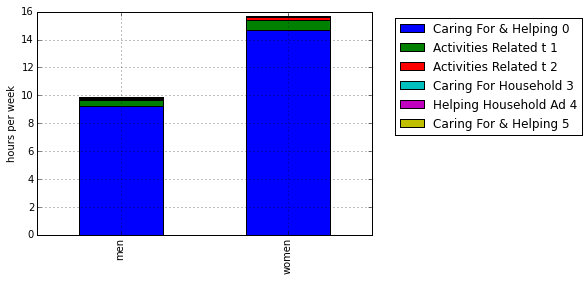

In [6]:
care_time.plot(kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("hours per week")
plt.show()

It should probably be noted that the gender difference in this analysis isn't just small, it amounts to about 6 hours per week. Primary care is the main time investment, and there's little different in the other categories.

# Older versus younger children

In [7]:
summary = pd.read_csv("../atusdata/atussum_2013/atussum_2013.dat")       # Activity Summary

In [8]:
under_6 = summary[(summary.TRYHHCHILD < 6) & (summary.TRYHHCHILD > -1)] # yields 2048 rows, about 20% of survey
over_6 =  summary[(summary.TRYHHCHILD >= 6) & (summary.TRYHHCHILD > -1)]

In [9]:
use_cols = atus_tools.activity_columns(summary, "03")
under_6_2 = under_6[use_cols].mean() / 60 * 7
over_6_2=   over_6[use_cols].mean() / 60 * 7
df_combined = pd.DataFrame(columns=use_cols)
df_combined.loc[0] = under_6_2
df_combined.loc[1] = over_6_2
df_combined = atus_tools.merge_2nd_level(df_combined)
print_cols = atus_tools.cat_descriptions(df_combined, "03")
df_combined.columns = print_cols

In [10]:
df_combined.index = ["under 6", "over 6"]

In [11]:
df_combined

,Caring For & Helping HH Children,Activities Related to HH Children's Education,Activities Related to HH Children's Health,Caring For Household Adults,Helping Household Adults,"Caring For & Helping HH Members, n.e.c.*"
under 6,12.386605,0.591252,0.159391,0.045972,0.069214,0.003418
over 6,3.789093,0.820180,0.128145,0.077778,0.093056,0.002451


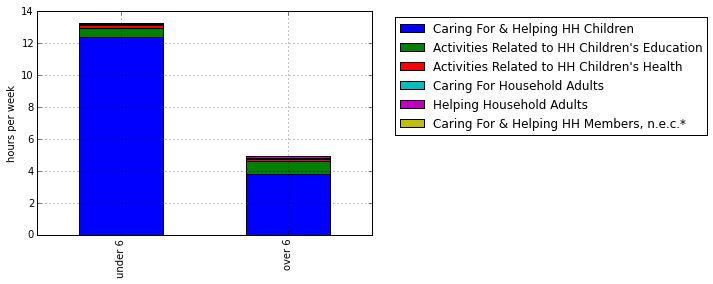

In [12]:
df_combined.plot(kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("hours per week")
plt.show()

Well this difference is even larger than the last one. Children who have aged over 5 are obviously vastly more independent and the data here spell out just how much. The difference is about 8 hours per week of investment of time. Education goes in the reverse of the trend, which parents spending more time on education for their children as those children age.

#Childcare by Income

In [13]:
summary = pd.read_csv("../atusdata/atussum_2013/atussum_2013.dat")       # Activity Summary

In [14]:
by_income = atus_tools.cut_by_income(summary, "03")

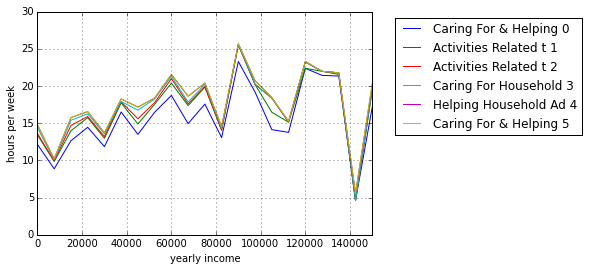

In [18]:
by_income.plot(kind="line", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel("hours per week")
plt.xlabel("yearly income")
plt.show()

Childcare seems to have an upward trend with income, although with a statistically rocky path. There is likely a problem with sample size for a few outliers shown here, like toward the highest income bin (which probably also has the fewest records). It's still clear that time investment in children increases with increasing income, and that education-related investment has an even more dramatic bias toward higher income households.